# Webscraping avec python

<p class="badges">

<a href="https://github.com/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/04a_webscraping_TP.ipynb" class="github"><i class="fab fa-github"></i></a>
<a href="https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/04a_webscraping_TP.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter" alt="Download"></a>
<a href="https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/04a_webscraping_TP.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter" alt="nbviewer"></a>
<a href="https://datalab.sspcloud.fr/launcher/ide/jupyter-python?autoLaunch=true&onyxia.friendlyName=%C2%ABpython-datascience%C2%BB&init.personalInit=%C2%ABhttps%3A%2F%2Fraw.githubusercontent.com%2Flinogaliana%2Fpython-datascientist%2Fmaster%2Fsspcloud%2Finit-jupyter.sh%C2%BB&init.personalInitArgs=%C2%ABmanipulation%2004a_webscraping_TP%C2%BB&security.allowlist.enabled=false" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&amp;color=yellow?logo=Python" alt="Onyxia"></a><br>
<a href="https://mybinder.org/v2/gh/linogaliana/python-datascientist/master?filepath={binder_path}" target="_blank" rel="noopener"><img src="https://img.shields.io/badge/Launch-Binder-E66581.svg?logo=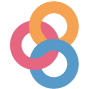" alt="Binder"></a>
<a href="http://colab.research.google.com/github/linogaliana/python-datascientist/blob/master/notebooks/course/manipulation/04a_webscraping_TP.ipynb" target="_blank" rel="noopener"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"></a>
<a href="https://github.dev/linogaliana/python-datascientist/notebooks/course/manipulation/04a_webscraping_TP.ipynb" target="_blank" rel="noopener"><img src="https://img.shields.io/static/v1?logo=visualstudiocode&label=&message=Open%20in%20Visual%20Studio%20Code&labelColor=2c2c32&color=007acc&logoColor=007acc" alt="githubdev"></a>

</p>

</p>

Le [webscraping](https://fr.wikipedia.org/wiki/Web_scraping) désigne les techniques d’extraction du contenu des sites internet.
C’est une pratique très utile pour toute personne souhaitant travailler sur des informations disponibles en ligne, mais n’existant pas forcément sous la forme d’un tableau *Excel*.

Ce TP vous présente comment créer et exécuter des robots afin de recupérer rapidement des informations utiles à vos projets actuels ou futurs.
Il part de quelques cas d’usages concret.
Ce chapitre est très fortement inspiré et réadapté à partir de [celui de Xavier Dupré](http://www.xavierdupre.fr/app/ensae_teaching_cs/helpsphinx/notebooks/TD2A_Eco_Web_Scraping.html), l’ancien professeur de la matière.

# Enjeux

Un certain nombre d’enjeux du *webscraping* ne seront évoqués
que superficiellement dans le cadre de ce chapitre.

## La zone grise de la légalité du *webscraping*

En premier lieu, en ce qui concerne la question de la légalité
de la récupération d’information par *scraping*, il existe
une zone grise. Ce n’est pas parce qu’une information est
disponible sur internet, directement ou avec un peu de recherche,
qu’elle peut être récupérée et réutilisée.

L’excellent cours d’[Antoine Palazzolo](https://inseefrlab.github.io/formation_webscraping/) évoque un certain nombre de cas
médiatiques et judiciaires sur cette question.
Dans le champ français, la CNIL a publié en 2020
de nouvelles directives sur le *webscraping* reprécisant
que toute donnée ne peut être réutilisée à l’insu de la personne
à laquelle ces données appartiennent. Autrement dit, en principe,
les données collectées par *webscraping* sont soumises au
RGPD, c’est-à-dire nécessitent le consentement des personnes
à partir desquelles la réutilisation des données est faite.

Il est donc recommandé d’**être vigilant avec les données récupérées**
par *webscraping* pour ne pas se mettre en faute légalement.

## Stabilité et fiabilité des informations reçues

La récupération de données par *webscraping*
est certes pratique mais elle ne correspond pas nécessairement
à un usage pensé, ou désiré, par un fournisseur de données.
Les données étant coûteuses à collecter et à mettre à disposition,
certains sites ne désirent pas nécessairement que celles-ci soient
extraites gratuitement et facilement. *A fortiori* lorsque la donnée
peut permettre à un concurrent de disposer d’une information
utile d’un point de vue commercial (prix d’un produit concurrent, etc.).

Les acteurs mettent donc souvent en oeuvre des stratégies pour bloquer ou
limiter la quantité de données scrappées. La méthode la plus
classique est la détection et le blocage
des requêtes faites par des robots plutôt que par des humains.
Pour des acteurs spécialisés, cette détection est très facile car
de nombreuses preuves permettent d’identifier si une visite du site *web*
provient d’un utilisateur
humain derrière un navigateur ou d’un robot. Pour ne citer que quelques indices:
vitesse de la navigation entre pages, rapidité à extraire la donnée,
empreinte digitale du navigateur utilisé, capacité à répondre à des
questions aléatoires (captcha)…
Les bonnes pratiques, évoquées par la suite, ont pour objectif de faire
en sorte qu’un robot se comporte de manière civile en adoptant un comportement
proche de celui de l’humain mais sans contrefaire le fait qu’il ne s’agit
pas d’un humain.

Il convient d’ailleurs
d’être prudent quant aux informations reçues par *webscraping*.
La donnée étant au coeur du modèle économique de certains acteurs, certains
n’hésitent pas à renvoyer des données fausses aux robots
plutôt que les bloquer. C’est de bonne guerre!
Une autre technique piège s’appelle le *honey pot*. Il s’agit de pages qu’un humain
n’irait jamais visiter - par exemple parce qu’elles n’apparaissent pas dans
l’interface graphique - mais sur lesquelles un robot, en recherche automatique
de contenu, va rester bloquer.

Sans aller jusqu’à la stratégie de blocage du *webscraping*, d’autres raisons
peuvent expliquer qu’une récupération de données ait fonctionné par
le passé mais ne fonctionne plus. La plus fréquente est un changement dans la structure
d’un site *web*. Le *webscraping* présente en effet l’inconvénient d’aller chercher
de l’information dans une structure très hiérarchisée. Un changement dans cette structure
peut suffire à rendre un robot incapable de récupérer du contenu. Or, pour rester
attractifs, les sites *web* changent fréquemment ce qui peut facilement
rendre inopérant un robot.

De manière générale, l’un des principaux messages de ce
chapitre, à retenir, est que le
**webscraping est une solution de dernier ressort, pour des récupérations ponctuelles de données sans garantie de fonctionnement ultérieur**. Il est préférable de **privilégier les API** lorsque celles-ci sont disponibles.
Ces dernières ressemblent à un contrat (formel ou non) entre un fournisseur de données
et un utilisateur où sont définis des besoins (les données) mais aussi des
conditions d’accès (nombre de requêtes, volumétrie, authentification…) là
où le *webscraping* est plus proche du comportement dans le *Far West*.

## Les bonnes pratiques

La possibilité de récupérer des données par l’intermédiaire
d’un robot ne signifie pas qu’on peut se permettre de n’être
pas civilisé. En effet, lorsqu’il est non-maîtrisé, le
*webscraping* peut ressembler à une attaque informatique
classique pour faire sauter un site *web*: le déni de service.
Le cours d’[Antoine Palazzolo](https://inseefrlab.github.io/formation_webscraping/) revient
sur certaines bonnes pratiques qui ont émergé dans la communauté
des *scrapeurs*. Il est recommandé de lire cette ressource
pour en apprendre plus sur ce sujet. Y sont évoqués
plusieurs conventions, parmi lesquelles :

-   Se rendre, depuis la racine du site,
    sur le fichier `robots.txt` pour vérifier les consignes
    proposées par les développeurs du site *web* pour
    cadrer le comportement des robots ;
-   Espacer chaque requêtes de plusieurs secondes, comme le ferait
    un humain, afin d’éviter de surcharger le site *web* et de le
    faire sauter par déni de service ;
-   Faire les requêtes dans les heures creuses de fréquentation du
    site *web* s’il ne s’agit pas d’un site consulté internationalement.
    Par exemple, pour un site en Français, lancer le robot
    pendant la nuit en France métropolitaine, est une bonne pratique.
    Pour lancer un robot depuis `Python` a une heure programmée
    à l’avancer, il existe les `cronjobs`.

# Un détour par le Web : comment fonctionne un site ?

Même si ce TP ne vise pas à faire un cours de web, il vous faut néanmoins certaines bases sur la manière dont un site internet fonctionne afin de comprendre comment sont structurées les informations sur une page.

Un site Web est un ensemble de pages codées en *HTML* qui permet de décrire à la fois le contenu et la forme d’une page *Web*.

Pour voir cela, ouvrez n’importe quelle page web et faites un clic-droit dessus.
- Sous `Chrome` <i class="fab fa-chrome"></i> : Cliquez ensuite sur *“Affichez le code source de la page”* (<kbd>CTRL</kbd>+<kbd>U</kbd>) ;
- Sous `Firefox` <i class="fab fa-firefox"></i> : *“Code source de la page”* (<kbd>CTRL</kbd>+<kbd>MAJ</kbd>+<kbd>K</kbd>) ;
- Sous `Edge` <i class="fab fa-edge"></i> : *“Affichez la page source”* (<kbd>CTRL</kbd>+<kbd>U</kbd>) ;
- Sous `Safari` <i class="fab fa-safari"></i> : voir comment faire [ici](https://fr.wikihow.com/voir-le-code-source)

## Les balises

Sur une page web, vous trouverez toujours à coup sûr des éléments comme `<head>`, `<title>`, etc. Il s’agit des codes qui vous permettent de structurer le contenu d’une page *HTML* et qui s’appellent des **balises**.
Citons, par exemple, les balises `<p>`, `<h1>`, `<h2>`, `<h3>`, `<strong>` ou `<em>`.
Le symbole `< >` est une balise : il sert à indiquer le début d’une partie. Le symbole `</ >` indique la fin de cette partie. La plupart des balises vont par paires, avec une *balise ouvrante* et une *balise fermante* (par exemple `<p>` et `</p>`).

### Exemple : les balise des tableaux

| Balise      | Description                     |
|-------------|---------------------------------|
| `<table>`   | Tableau                         |
| `<caption>` | Titre du tableau                |
| `<tr>`      | Ligne de tableau                |
| `<th>`      | Cellule d’en-tête               |
| `<td>`      | Cellule                         |
| `<thead>`   | Section de l’en-tête du tableau |
| `<tbody>`   | Section du corps du tableau     |
| `<tfoot>`   | Section du pied du tableau      |

**Application : un tableau en HTML**

Le code *HTML* du tableau suivant

``` {html}
<table>
<caption> Le Titre de mon tableau </caption>

   <tr>
      <th>Prénom</th>
      <th>Nom</th>
      <th>Profession</th>
   </tr>
   <tr>
      <td>Mike </td>
      <td>Stuntman</td>
      <td>Cascadeur</td>
   </tr>
   <tr>
      <td>Mister</td>
      <td>Pink</td>
      <td>Gangster</td>
   </tr>
</table>
```

Donnera dans le navigateur :

<table>
<caption> Le Titre de mon tableau </caption>

   <tr>
      <th>Prénom</th>
      <th>Nom</th>
      <th>Profession</th>
   </tr>
   <tr>
      <td>Mike </td>
      <td>Stuntman</td>
      <td>Cascadeur</td>
   </tr>
   <tr>
      <td>Mister</td>
      <td>Pink</td>
      <td>Gangster</td>
   </tr>
</table>

### Parent et enfant

Dans le cadre du langage HTML, les termes de parent (*parent*) et enfant (*child*) servent à désigner des élements emboîtés les uns dans les autres. Dans la construction suivante, par exemple :

``` html
< div> 
    < p>
       bla,bla
    < /p>
< /div>
```

Sur la page web, cela apparaitra de la manière suivante :

    <p>
       bla,bla
    </p>

On dira que l’élément `<div>` est le parent de l’élément `<p>` tandis que l’élément `<p>` est l’enfant de l’élément `<div>`.

> *Mais pourquoi apprendre ça pour “scraper” ?*

Parce que, pour bien récupérer les informations d’un site internet, il faut pouvoir comprendre sa structure et donc son code HTML. Les fonctions `Python` qui servent au *scraping* sont principalement construites pour vous permettre de naviguer entre les balises.
Avec `Python`, vous allez en fait reproduire votre comportement manuel de recherche de manière
à l’automatiser.

# Scraper avec python: le package `BeautifulSoup`

## Les packages disponibles

Dans la première partie de ce chapitre,
nous allons essentiellement utiliser le package [`BeautifulSoup4`](https://www.crummy.com/software/BeautifulSoup/bs4/doc/),
en conjonction avec [`urllib`](https://docs.python.org/3/library/urllib.html#module-urllib)
ou `requests`. Ces deux derniers *packages* permettent de récupérer le texte
brut d’une page qui sera ensuite
inspecté via [`BeautifulSoup4`](https://www.crummy.com/software/BeautifulSoup/bs4/doc/).

`BeautifulSoup` sera suffisant quand vous voudrez travailler sur des pages HTML statiques. Dès que les informations que vous recherchez sont générées via l’exécution de scripts [Javascript](https://fr.wikipedia.org/wiki/JavaScript), il vous faudra passer par des outils comme [Selenium](https://selenium-python.readthedocs.io/).

De même, si vous ne connaissez pas l’URL, il faudra passer par un *framework* comme [Scrapy](https://scrapy.org/), qui passe facilement d’une page à une autre. On appelle
cette technique le *“webcrawling”*. `Scrapy` est plus complexe à manipuler que `BeautifulSoup` : si vous voulez plus de détails, rendez-vous sur la page du [tutoriel `Scrapy`](https://doc.scrapy.org/en/latest/intro/tutorial.html).

Le *webscraping* est un domaine où la reproductibilité est compliquée à mettre en oeuvre.
Une page *web* évolue
potentiellement régulièrement et d’une page web à l’autre, la structure peut
être très différente ce qui rend certains codes difficilement exportables.
Par conséquent, la meilleure manière d’avoir un programme fonctionnel est
de comprendre la structure d’une page web et dissocier les éléments exportables
à d’autres cas d’usages des requêtes *ad hoc*.

{{< tweet 1474353569780355074 >}}

In [2]:
import urllib
import bs4
import pandas
from urllib import request

## Récupérer le contenu d’une page HTML

On va commencer doucement. Prenons une page *wikipedia*,
par exemple celle de la Ligue 1 de football, millésime 2019-2020 : [Championnat de France de football 2019-2020](https://fr.wikipedia.org/wiki/Championnat_de_France_de_football_2019-2020). On va souhaiter récupérer la liste des équipes, ainsi que les url des pages Wikipedia de ces équipes.

Etape :one: : se connecter à la page wikipedia et obtenir le code source.
Pour cela, le plus simple est d’utiliser le package `urllib` ou, mieux, `requests`.
Nous allons ici utiliser la fonction `request` du *package* `urllib`:

In [3]:
url_ligue_1 = "https://fr.wikipedia.org/wiki/Championnat_de_France_de_football_2019-2020"
    
request_text = request.urlopen(url_ligue_1).read()
# print(request_text[:1000])    

In [4]:
type(request_text)

bytes

Etape :two: : utiliser le package BeautifulSoup
qui permet de rechercher efficacement
les balises contenues dans la chaine de caractères
renvoyée par la fonction `request`:

In [5]:
page = bs4.BeautifulSoup(request_text, "lxml")

Si on *print* l’objet `page` créée avec `BeautifulSoup`,
on voit que ce n’est plus une chaine de caractères mais bien une page HTML avec des balises.
On peut à présent chercher des élements à l’intérieur de ces balises.

## La méthode `find`

Par exemple, si on veut connaître le titre de la page, on utilise la méthode `.find` et on lui demande *“title”*

In [6]:
print(page.find("title"))

<title>Championnat de France de football 2019-2020 — Wikipédia</title>

La methode `.find` ne renvoie que la première occurence de l’élément.

Pour vous en assurer vous pouvez :

-   copier le bout de code source obtenu,
-   le coller dans une cellule de votre notebook
-   et passer la cellule en *“Markdown”*

La cellule avec le copier-coller du code source donne :

In [7]:
print(page.find("table"))

<table><caption style="background-color:#99cc99;color:#000000;">Généralités</caption><tbody><tr>
<th scope="row" style="width:10.5em;">Sport</th>
<td>
<a href="/wiki/Football" title="Football">Football</a></td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Organisateur(s)</th>
<td>
<a href="/wiki/Ligue_de_football_professionnel" title="Ligue de football professionnel">LFP</a></td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Édition</th>
<td>
<abbr class="abbr" title="Quatre-vingt-deuxième (huitante-deuxième / octante-deuxième)">82<sup>e</sup></abbr></td>
</tr>
<tr>
<th scope="row" style="width:10.5em;">Lieu(x)</th>
<td>
<span class="datasortkey" data-sort-value="France"><span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau de la France"><img alt="Drapeau de la France" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_Fran

ce qui est le texte source permettant de générer le tableau suivant:

<table>

<caption style="background-color:#99cc99;color:#000000;">

Généralités

</caption>

<tbody>

<tr>

<th scope="row" style="width:10.5em;">

Sport

</th>

<td>

<a href="/wiki/Football" title="Football">Football</a>

</td>

</tr>

<tr>

<th scope="row" style="width:10.5em;">

Organisateur(s)

</th>

<td>

<a href="/wiki/Ligue_de_football_professionnel" title="Ligue de football professionnel">LFP</a>

</td>

</tr>

<tr>

<th scope="row" style="width:10.5em;">

Édition

</th>

<td>

<abbr class="abbr" title="Quatre-vingt-deuxième (huitante-deuxième / octante-deuxième)">82<sup>e</sup></abbr>

</td>

</tr>

<tr>

<th scope="row" style="width:10.5em;">

Lieu(x)

</th>

<td>

<span class="datasortkey" data-sort-value="France"><span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau de la France"><img alt="Drapeau de la France" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a> </span><a href="/wiki/France" title="France">France</a></span> et <br/><span class="datasortkey" data-sort-value="Monaco"><span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_Monaco.svg" title="Drapeau de Monaco"><img alt="Drapeau de Monaco" class="noviewer thumbborder" data-file-height="800" data-file-width="1000" decoding="async" height="16" src="//upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Flag_of_Monaco.svg/20px-Flag_of_Monaco.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Flag_of_Monaco.svg/30px-Flag_of_Monaco.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/e/ea/Flag_of_Monaco.svg/40px-Flag_of_Monaco.svg.png 2x" width="20"/></a> </span><a href="/wiki/Monaco" title="Monaco">Monaco</a></span>

</td>

</tr>

<tr>

<th scope="row" style="width:10.5em;">

Date

</th>

<td>

Du <time class="nowrap date-lien" data-sort-value="2019-08-09" datetime="2019-08-09"><a href="/wiki/9_ao%C3%BBt_en_sport" title="9 août en sport">9</a> <a class="mw-redirect" href="/wiki/Ao%C3%BBt_2019_en_sport" title="Août 2019 en sport">août</a> <a href="/wiki/2019_en_football" title="2019 en football">2019</a></time><br/>au <time class="nowrap date-lien" data-sort-value="2020-03-08" datetime="2020-03-08"><a href="/wiki/8_mars_en_sport" title="8 mars en sport">8 mars</a> <a href="/wiki/2020_en_football" title="2020 en football">2020</a></time> <small>(arrêt définitif)</small>

</td>

</tr>

<tr>

<th scope="row" style="width:10.5em;">

Participants

</th>

<td>

20 équipes

</td>

</tr>

<tr>

<th scope="row" style="width:10.5em;">

Matchs joués

</th>

<td>

279 (sur 380 prévus)

</td>

</tr>

<tr>

<th scope="row" style="width:10.5em;">

Site web officiel

</th>

<td>

<a class="external text" href="https://www.ligue1.fr/" rel="nofollow">Site officiel</a>

</td>

</tr>

</tbody>

</table>

## La méthode `findAll`

Pour trouver toutes les occurences, on utilise `.findAll()`.

In [9]:
print("Il y a", len(page.findAll("table")), "éléments dans la page qui sont des <table>")

Il y a 34 éléments dans la page qui sont des <table>

# Exercice guidé : obtenir la liste des équipes de Ligue 1

Dans le premier paragraphe de la page *“Participants”*,
on a le tableau avec les résultats de l’année.

<div class="alert alert-success" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #3fb618;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Exercice 1 : Récupérer les participants de la Ligue 1</h3>

Pour cela, nous allons procéder en 6 étapes:

1.  Trouver le tableau
2.  Récupérer chaque ligne du table
3.  Nettoyer les sorties en ne gardant que le texte sur une ligne
4.  Généraliser sur toutes les lignes
5.  Récupérer les entêtes du tableau
6.  Finalisation du tableau

</div>

1️ Trouver le tableau

In [10]:
# on identifie le tableau en question : c'est le premier qui a cette classe "wikitable sortable"
tableau_participants = page.find('table', {'class' : 'wikitable sortable'})

``` python
print(tableau_participants)
```

<table class="wikitable sortable" style="font-size:90%;line-height:15px;text-align:center">

<tbody>

<tr>

<th scope="col">

Club

</th>

<th scope="col">

Dernière<br/>montée

</th>

<th scope="col">

Budget<sup class="reference" id="cite_ref-3"><a href="#cite_note-3"><span class="cite_crochet">\[</span>3<span class="cite_crochet">\]</span></a></sup><br/>en M<a href="/wiki/Euro" title="Euro">€</a>

</th>

<th scope="col">

Classement<br/><a href="/wiki/Championnat_de_France_de_football_2018-2019" title="Championnat de France de football 2018-2019">2018-2019</a>

</th>

<th scope="col">

Entraîneur

</th>

<th scope="col">

Depuis

</th>

<th scope="col">

Stade

</th>

<th scope="col">

Capacité<br/>en L1<sup class="reference" id="cite_ref-4"><a href="#cite_note-4"><span class="cite_crochet">\[</span>4<span class="cite_crochet">\]</span></a></sup>

</th>

<th scope="col">

Nombre<br/>de saisons<br/>en L1

</th>

</tr>

<tr bgcolor="#97DEFF">

<td>

<a href="/wiki/Paris_Saint-Germain_Football_Club" title="Paris Saint-Germain Football Club">Paris Saint-Germain</a>

</td>

<td>

1974

</td>

<td>

637

</td>

<td>

<span data-sort-value="101 !"></span><abbr class="abbr" title="Premier">1<sup>er</sup></abbr>

</td>

<td align="left">

<span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_Germany.svg" title="Drapeau : Allemagne"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="1000" decoding="async" height="12" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Flag_of_Germany.svg/20px-Flag_of_Germany.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Flag_of_Germany.svg/30px-Flag_of_Germany.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Flag_of_Germany.svg/40px-Flag_of_Germany.svg.png 2x" width="20"/></a></span> <a href="/wiki/Thomas_Tuchel" title="Thomas Tuchel">Thomas Tuchel</a>

</td>

<td>

2018

</td>

<td>

<a href="/wiki/Parc_des_Princes" title="Parc des Princes">Parc des Princes</a>

</td>

<td>

47 929

</td>

<td>

46

</td>

</tr>

<tr bgcolor="#97DEFF">

<td>

<a href="/wiki/LOSC_Lille" title="LOSC Lille">LOSC Lille</a>

</td>

<td>

2000

</td>

<td>

120

</td>

<td>

<span data-sort-value="102 !"></span><abbr class="abbr" title="Deuxième">2<sup>e</sup></abbr>

</td>

<td align="left">

<span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> <a href="/wiki/Christophe_Galtier" title="Christophe Galtier">Christophe Galtier</a>

</td>

<td>

2017

</td>

<td>

<a href="/wiki/Stade_Pierre-Mauroy" title="Stade Pierre-Mauroy">Stade Pierre-Mauroy</a>

</td>

<td>

49 712

</td>

<td>

59

</td>

</tr>

<tr bgcolor="#97DEFF">

<td>

<a href="/wiki/Olympique_lyonnais" title="Olympique lyonnais">Olympique lyonnais</a>

</td>

<td>

1989

</td>

<td>

310

</td>

<td>

<span data-sort-value="103 !"></span><abbr class="abbr" title="Troisième">3<sup>e</sup></abbr>

</td>

<td align="left">

<span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> <a href="/wiki/Rudi_Garcia" title="Rudi Garcia">Rudi Garcia</a>

</td>

<td>

2019

</td>

<td>

<a href="/wiki/Parc_Olympique_lyonnais" title="Parc Olympique lyonnais">Groupama Stadium</a>

</td>

<td>

57 206

</td>

<td>

60

</td>

</tr>

<tr bgcolor="#FFE052">

<td>

<a href="/wiki/Association_sportive_de_Saint-%C3%89tienne" title="Association sportive de Saint-Étienne">AS Saint-Étienne</a>

</td>

<td>

2004

</td>

<td>

100

</td>

<td>

<span data-sort-value="104 !"></span><abbr class="abbr" title="Quatrième">4<sup>e</sup></abbr>

</td>

<td align="left">

<span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> <a href="/wiki/Claude_Puel" title="Claude Puel">Claude Puel</a>

</td>

<td>

2019

</td>

<td>

<a href="/wiki/Stade_Geoffroy-Guichard" title="Stade Geoffroy-Guichard">Stade Geoffroy-Guichard</a>

</td>

<td>

41 965

</td>

<td>

66

</td>

</tr>

<tr>

<td>

<a href="/wiki/Olympique_de_Marseille" title="Olympique de Marseille">Olympique de Marseille</a>

</td>

<td>

1996

</td>

<td>

110

</td>

<td>

<span data-sort-value="105 !"></span><abbr class="abbr" title="Cinquième">5<sup>e</sup></abbr>

</td>

<td align="left">

<span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_Portugal.svg" title="Drapeau : Portugal"><img alt="" class="noviewer thumbborder" data-file-height="400" data-file-width="600" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Portugal.svg/20px-Flag_of_Portugal.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Portugal.svg/30px-Flag_of_Portugal.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Portugal.svg/40px-Flag_of_Portugal.svg.png 2x" width="20"/></a></span> <a href="/wiki/Andr%C3%A9_Villas-Boas" title="André Villas-Boas">André Villas-Boas</a>

</td>

<td>

2019

</td>

<td>

<a href="/wiki/Stade_V%C3%A9lodrome" title="Stade Vélodrome">Orange Vélodrome</a>

</td>

<td>

66 226

</td>

<td>

69

</td>

</tr>

<tr>

<td>

<a href="/wiki/Montpellier_H%C3%A9rault_Sport_Club" title="Montpellier Hérault Sport Club">Montpellier HSC</a>

</td>

<td>

2009

</td>

<td>

40

</td>

<td>

<span data-sort-value="106 !"></span><abbr class="abbr" title="Sixième">6<sup>e</sup></abbr>

</td>

<td align="left">

<span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_Armenia.svg" title="Drapeau : Arménie"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="1200" decoding="async" height="10" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Flag_of_Armenia.svg/20px-Flag_of_Armenia.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Flag_of_Armenia.svg/30px-Flag_of_Armenia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Flag_of_Armenia.svg/40px-Flag_of_Armenia.svg.png 2x" width="20"/></a></span><span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> <a href="/wiki/Michel_Der_Zakarian" title="Michel Der Zakarian">Michel Der Zakarian</a>

</td>

<td>

2017

</td>

<td>

<a href="/wiki/Stade_de_la_Mosson" title="Stade de la Mosson">Stade de la Mosson</a>

</td>

<td>

22 000

</td>

<td>

27

</td>

</tr>

<tr>

<td>

<a class="mw-redirect" href="/wiki/Olympique_Gymnaste_Club_Nice" title="Olympique Gymnaste Club Nice">OGC Nice</a>

</td>

<td>

2002

</td>

<td>

50

</td>

<td>

<span data-sort-value="107 !"></span><abbr class="abbr" title="Septième">7<sup>e</sup></abbr>

</td>

<td align="left">

<span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> <a href="/wiki/Patrick_Vieira" title="Patrick Vieira">Patrick Vieira</a>

</td>

<td>

2018

</td>

<td>

<a href="/wiki/Allianz_Riviera" title="Allianz Riviera">Allianz Riviera</a>

</td>

<td>

35 596

</td>

<td>

60

</td>

</tr>

<tr>

<td>

<a href="/wiki/Stade_de_Reims" title="Stade de Reims">Stade de Reims</a>

</td>

<td>

2018

</td>

<td>

45

</td>

<td>

<span data-sort-value="108 !"></span><abbr class="abbr" title="Huitième">8<sup>e</sup></abbr>

</td>

<td align="left">

<span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> <a href="/wiki/David_Guion" title="David Guion">David Guion</a>

</td>

<td>

2017

</td>

<td>

<a href="/wiki/Stade_Auguste-Delaune" title="Stade Auguste-Delaune">Stade Auguste-Delaune</a>

</td>

<td>

20 546

</td>

<td>

35

</td>

</tr>

<tr>

<td>

<a href="/wiki/N%C3%AEmes_Olympique" title="Nîmes Olympique">Nîmes Olympique</a>

</td>

<td>

2018

</td>

<td>

27

</td>

<td>

<span data-sort-value="109 !"></span><abbr class="abbr" title="Neuvième">9<sup>e</sup></abbr>

</td>

<td align="left">

<span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> <a href="/wiki/Bernard_Blaquart" title="Bernard Blaquart">Bernard Blaquart</a>

</td>

<td>

2015

</td>

<td>

<a href="/wiki/Stade_des_Costi%C3%A8res" title="Stade des Costières">Stade des Costières</a>

</td>

<td>

15 788

</td>

<td>

35

</td>

</tr>

<tr bgcolor="#FFE052">

<td>

<a class="mw-redirect" href="/wiki/Stade_rennais_football_club" title="Stade rennais football club">Stade rennais FC</a>

</td>

<td>

1994

</td>

<td>

65

</td>

<td>

<span data-sort-value="110 !"></span><abbr class="abbr" title="Dixième">10<sup>e</sup></abbr>

</td>

<td align="left">

<span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> <a href="/wiki/Julien_St%C3%A9phan" title="Julien Stéphan">Julien Stéphan</a>

</td>

<td>

2018

</td>

<td>

<a href="/wiki/Roazhon_Park" title="Roazhon Park">Roazhon Park</a>

</td>

<td>

29 194

</td>

<td>

62

</td>

</tr>

<tr bgcolor="#FFF052">

<td>

<a href="/wiki/Racing_Club_de_Strasbourg_Alsace" title="Racing Club de Strasbourg Alsace">RC Strasbourg Alsace</a>

</td>

<td>

2017

</td>

<td>

43

</td>

<td>

<span data-sort-value="111 !"></span><abbr class="abbr" title="Onzième">11<sup>e</sup></abbr>

</td>

<td align="left">

<span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> <a href="/wiki/Thierry_Laurey" title="Thierry Laurey">Thierry Laurey</a>

</td>

<td>

2016

</td>

<td>

<a href="/wiki/Stade_de_la_Meinau" title="Stade de la Meinau">Stade de la Meinau</a>

</td>

<td>

26 109

</td>

<td>

58

</td>

</tr>

<tr>

<td>

<a href="/wiki/Football_Club_de_Nantes" title="Football Club de Nantes">FC Nantes</a>

</td>

<td>

2013

</td>

<td>

70

</td>

<td>

<span data-sort-value="112 !"></span><abbr class="abbr" title="Douzième">12<sup>e</sup></abbr>

</td>

<td align="left">

<span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> <a href="/wiki/Christian_Gourcuff" title="Christian Gourcuff">Christian Gourcuff</a>

</td>

<td>

2019

</td>

<td>

<a href="/wiki/Stade_de_la_Beaujoire" title="Stade de la Beaujoire">Stade de la Beaujoire - Louis Fonteneau</a>

</td>

<td>

35 322

</td>

<td>

51

</td>

</tr>

<tr>

<td>

<a class="mw-redirect" href="/wiki/Angers_sporting_club_de_l%27Ouest" title="Angers sporting club de l'Ouest">SCO d’Angers</a>

</td>

<td>

2015

</td>

<td>

32

</td>

<td>

<span data-sort-value="113 !"></span><abbr class="abbr" title="Treizième">13<sup>e</sup></abbr>

</td>

<td align="left">

<span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> <a href="/wiki/St%C3%A9phane_Moulin_(football)" title="Stéphane Moulin (football)">Stéphane Moulin</a>

</td>

<td>

2011

</td>

<td>

<a href="/wiki/Stade_Raymond-Kopa" title="Stade Raymond-Kopa">Stade Raymond-Kopa</a>

</td>

<td>

14 582

</td>

<td>

27

</td>

</tr>

<tr>

<td>

<a href="/wiki/Football_Club_des_Girondins_de_Bordeaux" title="Football Club des Girondins de Bordeaux">Girondins de Bordeaux</a>

</td>

<td>

1992

</td>

<td>

70

</td>

<td>

<span data-sort-value="114 !"></span><abbr class="abbr" title="Quatorzième">14<sup>e</sup></abbr>

</td>

<td align="left">

<span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_Portugal.svg" title="Drapeau : Portugal"><img alt="" class="noviewer thumbborder" data-file-height="400" data-file-width="600" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Portugal.svg/20px-Flag_of_Portugal.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Portugal.svg/30px-Flag_of_Portugal.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/5/5c/Flag_of_Portugal.svg/40px-Flag_of_Portugal.svg.png 2x" width="20"/></a></span> <a href="/wiki/Paulo_Sousa_(football,_1970)" title="Paulo Sousa (football, 1970)">Paulo Sousa</a>

</td>

<td>

2019

</td>

<td>

<a href="/wiki/Matmut_Atlantique" title="Matmut Atlantique">Matmut Atlantique</a>

</td>

<td>

42 115

</td>

<td>

66

</td>

</tr>

<tr>

<td>

<a href="/wiki/Amiens_Sporting_Club" title="Amiens Sporting Club">Amiens SC</a>

</td>

<td>

2017

</td>

<td>

30

</td>

<td>

<span data-sort-value="115 !"></span><abbr class="abbr" title="Quinzième">15<sup>e</sup></abbr>

</td>

<td align="left">

<span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_Slovenia.svg" title="Drapeau : Slovénie"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="1200" decoding="async" height="10" src="//upload.wikimedia.org/wikipedia/commons/thumb/f/f0/Flag_of_Slovenia.svg/20px-Flag_of_Slovenia.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/f/f0/Flag_of_Slovenia.svg/30px-Flag_of_Slovenia.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/f/f0/Flag_of_Slovenia.svg/40px-Flag_of_Slovenia.svg.png 2x" width="20"/></a></span> <a href="/wiki/Luka_Elsner" title="Luka Elsner">Luka Elsner</a>

</td>

<td>

2019

</td>

<td>

<a href="/wiki/Stade_de_la_Licorne" title="Stade de la Licorne">Stade Crédit Agricole la Licorne</a>

</td>

<td>

12 999

</td>

<td>

2

</td>

</tr>

<tr>

<td>

<a href="/wiki/Toulouse_Football_Club" title="Toulouse Football Club">Toulouse FC</a>

</td>

<td>

2003

</td>

<td>

35

</td>

<td>

<span data-sort-value="116 !"></span><abbr class="abbr" title="Seizième">16<sup>e</sup></abbr>

</td>

<td align="left">

<span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> <a href="/wiki/Denis_Zanko" title="Denis Zanko">Denis Zanko</a>

</td>

<td>

2020

</td>

<td>

<a href="/wiki/Stadium_de_Toulouse" title="Stadium de Toulouse">Stadium de Toulouse</a>

</td>

<td>

33 033

</td>

<td>

32

</td>

</tr>

<tr>

<td>

<a class="mw-redirect" href="/wiki/Association_sportive_de_Monaco_football_club" title="Association sportive de Monaco football club">AS Monaco</a>

</td>

<td>

2013

</td>

<td>

220

</td>

<td>

<span data-sort-value="117 !"></span><abbr class="abbr" title="Dix-septième">17<sup>e</sup></abbr>

</td>

<td align="left">

<span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_Spain.svg" title="Drapeau : Espagne"><img alt="" class="noviewer thumbborder" data-file-height="500" data-file-width="750" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Spain.svg/20px-Flag_of_Spain.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Spain.svg/30px-Flag_of_Spain.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/9/9a/Flag_of_Spain.svg/40px-Flag_of_Spain.svg.png 2x" width="20"/></a></span> <a href="/wiki/Robert_Moreno" title="Robert Moreno">Robert Moreno</a>

</td>

<td>

2019

</td>

<td>

<a href="/wiki/Stade_Louis-II" title="Stade Louis-II">Stade Louis-II</a>

</td>

<td>

16 500

</td>

<td>

60

</td>

</tr>

<tr>

<td>

<a href="/wiki/Dijon_Football_C%C3%B4te-d%27Or" title="Dijon Football Côte-d'Or">Dijon FCO</a>

</td>

<td>

2016

</td>

<td>

38

</td>

<td>

<span data-sort-value="118 !"></span><abbr class="abbr" title="Dix-huitième">18<sup>e</sup></abbr>

</td>

<td align="left">

<span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> <a href="/wiki/St%C3%A9phane_Jobard" title="Stéphane Jobard">Stéphane Jobard</a>

</td>

<td>

2019

</td>

<td>

<a href="/wiki/Stade_Gaston-G%C3%A9rard" title="Stade Gaston-Gérard">Parc des Sports Gaston-Gérard</a>

</td>

<td>

15 459

</td>

<td>

4

</td>

</tr>

<tr bgcolor="#a8fca8">

<td>

<a href="/wiki/Football_Club_de_Metz" title="Football Club de Metz">FC Metz</a>

</td>

<td>

2019

</td>

<td>

40

</td>

<td>

<span data-sort-value="201 !"></span><abbr class="abbr" title="Premier">1<sup>er</sup></abbr> (<a class="mw-redirect" href="/wiki/Championnat_de_France_de_football_de_Ligue_2_2018-2019" title="Championnat de France de football de Ligue 2 2018-2019">Ligue 2</a>)

</td>

<td align="left">

<span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> <a href="/wiki/Vincent_Hognon" title="Vincent Hognon">Vincent Hognon</a>

</td>

<td>

2019

</td>

<td>

<a href="/wiki/Stade_Saint-Symphorien" title="Stade Saint-Symphorien">Stade Saint-Symphorien</a>

</td>

<td>

25 865

</td>

<td>

61

</td>

</tr>

<tr bgcolor="#a8fca8">

<td>

<a href="/wiki/Stade_brestois_29" title="Stade brestois 29">Stade brestois 29</a>

</td>

<td>

2019

</td>

<td>

30

</td>

<td>

<span data-sort-value="202 !"></span><abbr class="abbr" title="Deuxième">2<sup>e</sup></abbr> (<a class="mw-redirect" href="/wiki/Championnat_de_France_de_football_de_Ligue_2_2018-2019" title="Championnat de France de football de Ligue 2 2018-2019">Ligue 2</a>)

</td>

<td align="left">

<span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_France.svg" title="Drapeau : France"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="13" src="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/20px-Flag_of_France.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/30px-Flag_of_France.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Flag_of_France.svg/40px-Flag_of_France.svg.png 2x" width="20"/></a></span> <a href="/wiki/Olivier_Dall%27Oglio" title="Olivier Dall'Oglio">Olivier Dall’Oglio</a>

</td>

<td>

2019

</td>

<td>

<a href="/wiki/Stade_Francis-Le_Bl%C3%A9" title="Stade Francis-Le Blé">Stade Francis-Le Blé</a>

</td>

<td>

14 920

</td>

<td>

13

</td>

</tr>

</tbody>

</table>

2️ Récupérer chaque ligne du tableau.

On recherche d’abord toutes les lignes du tableau avec la balise `tr`

In [12]:
table_body = tableau_participants.find('tbody')
rows = table_body.find_all('tr')

On obtient une liste où chaque élément est une des lignes du tableau
Pour illustrer cela, on va d’abord afficher la première ligne.
Celle-ci correspont aux entêtes de colonne:

In [13]:
print(rows[0])

<tr>
<th scope="col">Club
</th>
<th scope="col">Dernière<br/>montée
</th>
<th scope="col">Budget<sup class="reference" id="cite_ref-3"><a href="#cite_note-3"><span class="cite_crochet">[</span>3<span class="cite_crochet">]</span></a></sup><br/>en M<a href="/wiki/Euro" title="Euro">€</a>
</th>
<th scope="col">Classement<br/><a href="/wiki/Championnat_de_France_de_football_2018-2019" title="Championnat de France de football 2018-2019">2018-2019</a>
</th>
<th scope="col">Entraîneur
</th>
<th scope="col">Depuis
</th>
<th scope="col">Stade
</th>
<th scope="col">Capacité<br/>en L1<sup class="reference" id="cite_ref-4"><a href="#cite_note-4"><span class="cite_crochet">[</span>4<span class="cite_crochet">]</span></a></sup>
</th>
<th scope="col">Nombre<br/>de saisons<br/>en L1
</th></tr>

La seconde ligne va correspondre à la ligne du premier club présent dans le tableau:

In [14]:
print(rows[1])

<tr bgcolor="#97DEFF">
<td><a href="/wiki/Paris_Saint-Germain_Football_Club" title="Paris Saint-Germain Football Club">Paris Saint-Germain</a>
</td>
<td>1974
</td>
<td>637
</td>
<td><span data-sort-value="101 !"></span><abbr class="abbr" title="Premier">1<sup>er</sup></abbr>
</td>
<td align="left"><span class="flagicon"><a class="image" href="/wiki/Fichier:Flag_of_Germany.svg" title="Drapeau : Allemagne"><img alt="" class="noviewer thumbborder" data-file-height="600" data-file-width="1000" decoding="async" height="12" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Flag_of_Germany.svg/20px-Flag_of_Germany.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Flag_of_Germany.svg/30px-Flag_of_Germany.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/ba/Flag_of_Germany.svg/40px-Flag_of_Germany.svg.png 2x" width="20"/></a></span> <a href="/wiki/Thomas_Tuchel" title="Thomas Tuchel">Thomas Tuchel</a>
</td>
<td>2018
</td>
<td><a href="/wiki/Parc_des_Prince

3️ Nettoyer les sorties en ne gardant que le texte sur une ligne

On va utiliser l’attribut `text` afin de se débarasser de toute la couche de HTML qu’on obtient à l’étape 2.

Un exemple sur la ligne du premier club :
- on commence par prendre toutes les cellules de cette ligne, avec la balise `td`.
- on fait ensuite une boucle sur chacune des cellules et on ne garde que le texte de la cellule avec l’attribut `text`.
- enfin, on applique la méthode `strip()` pour que le texte soit bien mis en forme (sans espace inutile etc).

In [15]:
cols = rows[1].find_all('td')
print(cols[0])
print(cols[0].text.strip())

<td><a href="/wiki/Paris_Saint-Germain_Football_Club" title="Paris Saint-Germain Football Club">Paris Saint-Germain</a>
</td>
Paris Saint-Germain

In [16]:
for ele in cols : 
    print(ele.text.strip())

Paris Saint-Germain
1974
637
1er
Thomas Tuchel
2018
Parc des Princes
47 929
46

4️ Généraliser sur toutes les lignes :

In [17]:
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    print(cols)

[]
['Paris Saint-Germain', '1974', '637', '1er', 'Thomas Tuchel', '2018', 'Parc des Princes', '47\xa0929', '46']
['LOSC Lille', '2000', '120', '2e', 'Christophe Galtier', '2017', 'Stade Pierre-Mauroy', '49\xa0712', '59']
['Olympique lyonnais', '1989', '310', '3e', 'Rudi Garcia', '2019', 'Groupama Stadium', '57\xa0206', '60']
['AS Saint-Étienne', '2004', '100', '4e', 'Claude Puel', '2019', 'Stade Geoffroy-Guichard', '41\xa0965', '66']
['Olympique de Marseille', '1996', '110', '5e', 'André Villas-Boas', '2019', 'Orange Vélodrome', '66\xa0226', '69']
['Montpellier HSC', '2009', '40', '6e', 'Michel Der Zakarian', '2017', 'Stade de la Mosson', '22\xa0000', '27']
['OGC Nice', '2002', '50', '7e', 'Patrick Vieira', '2018', 'Allianz Riviera', '35\xa0596', '60']
['Stade de Reims', '2018', '45', '8e', 'David Guion', '2017', 'Stade Auguste-Delaune', '20\xa0546', '35']
['Nîmes Olympique', '2018', '27', '9e', 'Bernard Blaquart', '2015', 'Stade des Costières', '15\xa0788', '35']
['Stade rennais FC', 

On a bien réussi à avoir les informations contenues dans le tableau des participants du championnat.
Mais la première ligne est étrange : c’est une liste vide …

Il s’agit des en-têtes : elles sont reconnues par la balise `th` et non `td`.

On va mettre tout le contenu dans un dictionnaire, pour le transformer ensuite en DataFrame pandas :

In [18]:
dico_participants = dict()
for row in rows:
    cols = row.find_all('td')
    cols = [ele.text.strip() for ele in cols]
    if len(cols) > 0 : 
        dico_participants[cols[0]] = cols[1:]
dico_participants

{'Paris Saint-Germain': ['1974',
  '637',
  '1er',
  'Thomas Tuchel',
  '2018',
  'Parc des Princes',
  '47\xa0929',
  '46'],
 'LOSC Lille': ['2000',
  '120',
  '2e',
  'Christophe Galtier',
  '2017',
  'Stade Pierre-Mauroy',
  '49\xa0712',
  '59'],
 'Olympique lyonnais': ['1989',
  '310',
  '3e',
  'Rudi Garcia',
  '2019',
  'Groupama Stadium',
  '57\xa0206',
  '60'],
 'AS Saint-Étienne': ['2004',
  '100',
  '4e',
  'Claude Puel',
  '2019',
  'Stade Geoffroy-Guichard',
  '41\xa0965',
  '66'],
 'Olympique de Marseille': ['1996',
  '110',
  '5e',
  'André Villas-Boas',
  '2019',
  'Orange Vélodrome',
  '66\xa0226',
  '69'],
 'Montpellier HSC': ['2009',
  '40',
  '6e',
  'Michel Der Zakarian',
  '2017',
  'Stade de la Mosson',
  '22\xa0000',
  '27'],
 'OGC Nice': ['2002',
  '50',
  '7e',
  'Patrick Vieira',
  '2018',
  'Allianz Riviera',
  '35\xa0596',
  '60'],
 'Stade de Reims': ['2018',
  '45',
  '8e',
  'David Guion',
  '2017',
  'Stade Auguste-Delaune',
  '20\xa0546',
  '35'],
 'Nîme

In [19]:
data_participants = pandas.DataFrame.from_dict(dico_participants,orient='index')
data_participants.head()

,0,1,2,3,4,5,6,7
Paris Saint-Germain,1974,637,1er,Thomas Tuchel,2018,Parc des Princes,47 929,46
LOSC Lille,2000,120,2e,Christophe Galtier,2017,Stade Pierre-Mauroy,49 712,59
Olympique lyonnais,1989,310,3e,Rudi Garcia,2019,Groupama Stadium,57 206,60
AS Saint-Étienne,2004,100,4e,Claude Puel,2019,Stade Geoffroy-Guichard,41 965,66
Olympique de Marseille,1996,110,5e,André Villas-Boas,2019,Orange Vélodrome,66 226,69


5️ Récupérer les en-têtes du tableau:

In [20]:
for row in rows:
    cols = row.find_all('th')
    print(cols)
    if len(cols) > 0 : 
        cols = [ele.get_text(separator=' ').strip().title() for ele in cols]
        columns_participants = cols

[<th scope="col">Club
</th>, <th scope="col">Dernière<br/>montée
</th>, <th scope="col">Budget<sup class="reference" id="cite_ref-3"><a href="#cite_note-3"><span class="cite_crochet">[</span>3<span class="cite_crochet">]</span></a></sup><br/>en M<a href="/wiki/Euro" title="Euro">€</a>
</th>, <th scope="col">Classement<br/><a href="/wiki/Championnat_de_France_de_football_2018-2019" title="Championnat de France de football 2018-2019">2018-2019</a>
</th>, <th scope="col">Entraîneur
</th>, <th scope="col">Depuis
</th>, <th scope="col">Stade
</th>, <th scope="col">Capacité<br/>en L1<sup class="reference" id="cite_ref-4"><a href="#cite_note-4"><span class="cite_crochet">[</span>4<span class="cite_crochet">]</span></a></sup>
</th>, <th scope="col">Nombre<br/>de saisons<br/>en L1
</th>]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]

In [21]:
columns_participants

['Club',
 'Dernière Montée',
 'Budget [ 3 ] En M €',
 'Classement 2018-2019',
 'Entraîneur',
 'Depuis',
 'Stade',
 'Capacité En L1 [ 4 ]',
 'Nombre De Saisons En L1']

6️ Finalisation du tableau

In [23]:
data_participants.columns = columns_participants[1:]

In [24]:
data_participants.head()

,Dernière Montée,Budget [ 3 ] En M €,Classement 2018-2019,Entraîneur,Depuis,Stade,Capacité En L1 [ 4 ],Nombre De Saisons En L1
Paris Saint-Germain,1974,637,1er,Thomas Tuchel,2018,Parc des Princes,47 929,46
LOSC Lille,2000,120,2e,Christophe Galtier,2017,Stade Pierre-Mauroy,49 712,59
Olympique lyonnais,1989,310,3e,Rudi Garcia,2019,Groupama Stadium,57 206,60
AS Saint-Étienne,2004,100,4e,Claude Puel,2019,Stade Geoffroy-Guichard,41 965,66
Olympique de Marseille,1996,110,5e,André Villas-Boas,2019,Orange Vélodrome,66 226,69


## Pour aller plus loin

### Récupération des localisations des stades

Essayez de comprendre pas à pas ce qui est fait dans les étapes qui suivent (la récupération d’informations supplémentaires en naviguant dans les pages des différents clubs).

In [25]:
import urllib
import pandas as pd
import bs4 

division=[]
equipe=[]
stade=[]
latitude_stade=[]        
longitude_stade=[]     

def dms2dd(degrees, minutes, seconds, direction):
    dd = float(degrees) + float(minutes)/60 + float(seconds)/(60*60);
    if direction == 'S' or direction == 'O':
        dd *= -1
    return dd;

url_list=["http://fr.wikipedia.org/wiki/Championnat_de_France_de_football_2019-2020", "http://fr.wikipedia.org/wiki/Championnat_de_France_de_football_de_Ligue_2_2019-2020"]

for url_ligue in url_list :
       
    print(url_ligue)
    sock = urllib.request.urlopen(url_ligue).read() 
    page=bs4.BeautifulSoup(sock)

# Rechercher les liens des équipes dans la liste disponible sur wikipedia 

    for team in page.findAll('span' , {'class' : 'toponyme'}) :  
        
        # Indiquer si c'est de la ligue 1 ou de la ligue 2
        
        if url_ligue==url_list[0] :
            division.append("L1")
        else :
            division.append("L2")

       # Trouver le nom et le lien de l'équipe
            
        if team.find('a')!=None :
            team_url=team.find('a').get('href')
            name_team=team.find('a').get('title')
            equipe.append(name_team)
            url_get_info = "http://fr.wikipedia.org"+team_url
            print(url_get_info)
 
       # aller sur la page de l'équipe
           
            search = urllib.request.urlopen(url_get_info).read()
            search_team=bs4.BeautifulSoup(search)

       # trouver le stade             
            compteur = 0
            for stadium in search_team.findAll('tr'):
                for x in stadium.findAll('th' , {'scope' : 'row'} ) :
                    if x.contents[0].string=="Stade" and compteur == 0:
                        compteur = 1
                        # trouver le lien du stade et son nom
                        url_stade=stadium.findAll('a')[1].get('href')
                        name_stadium=stadium.findAll('a')[1].get('title')
                        stade.append(name_stadium)
                        url_get_stade = "http://fr.wikipedia.org"+url_stade
                        print(url_get_stade)
                        
                        # Aller sur la page du stade et trouver ses coodronnées géographiques
                        
                        search_stade = urllib.request.urlopen(url_get_stade).read()
                        soup_stade=bs4.BeautifulSoup(search_stade) 
                        kartographer = soup_stade.find('a',{'class': "mw-kartographer-maplink"})
                        if kartographer == None :
                          latitude_stade.append(None)
                          longitude_stade.append(None) 
                        else :
                            for coordinates in kartographer :
                                print(coordinates)
                                liste =   coordinates.split(",")          
                                latitude_stade.append(str(liste[0]).replace(" ", "") + "'")
                                longitude_stade.append(str(liste[1]).replace(" ", "") + "'")
                            

dict = {'division' : division , 'equipe': equipe, 'stade': stade, 'latitude': latitude_stade, 'longitude' : longitude_stade}
data = pd.DataFrame(dict)
data = data.dropna()

http://fr.wikipedia.org/wiki/Championnat_de_France_de_football_2019-2020

http://fr.wikipedia.org/wiki/Paris_Saint-Germain_Football_Club

http://fr.wikipedia.org/wiki/Parc_des_Princes

48° 50′ 29″ N, 2° 15′ 11″ E
http://fr.wikipedia.org/wiki/LOSC_Lille

http://fr.wikipedia.org/wiki/Stade_Pierre-Mauroy

50° 36′ 43″ N, 3° 07′ 50″ E
http://fr.wikipedia.org/wiki/Olympique_lyonnais

http://fr.wikipedia.org/wiki/Parc_Olympique_lyonnais

45° 45′ 55″ N, 4° 58′ 55″ E
http://fr.wikipedia.org/wiki/Association_sportive_de_Saint-%C3%89tienne

http://fr.wikipedia.org/wiki/Stade_Geoffroy-Guichard

45° 27′ 39″ N, 4° 23′ 25″ E
http://fr.wikipedia.org/wiki/Olympique_de_Marseille

http://fr.wikipedia.org/wiki/Orange_V%C3%A9lodrome

43° 16′ 11″ N, 5° 23′ 45″ E
http://fr.wikipedia.org/wiki/Montpellier_H%C3%A9rault_Sport_Club

http://fr.wikipedia.org/wiki/Stade_de_la_Mosson

43° 37′ 19″ N, 3° 48′ 44″ E
http://fr.wikipedia.org/wiki/Stade_de_Reims

http://fr.wikipedia.org/wiki/Stade_Auguste-Delaune

49° 14′ 48″ N, 4° 01′ 30″ E
http://fr.wikipedia.org/wiki/Olympique_Gymnaste_Club_Nice

http://fr.wikipedia.org/wiki/Allianz_Riviera

43° 42′ 18″ N, 7° 11′ 33″ E
http://fr.wikipedia.org/wiki/N%C3%AEmes_Olympique

http://fr.wikipedia.org/wiki/Stade_des_Antonins
43° 48′ 39″ N, 4° 21′ 23″ E

http://fr.wikipedia.org/wiki/Racing_Club_de_Strasbourg_Alsace

http://fr.wikipedia.org/wiki/Stade_de_la_Meinau

48° 33′ 36″ N, 7° 45′ 18″ E
http://fr.wikipedia.org/wiki/Stade_rennais_Football_Club

http://fr.wikipedia.org/wiki/Roazhon_Park

48° 06′ 27″ N, 1° 42′ 46″ O
http://fr.wikipedia.org/wiki/Angers_sporting_club_de_l%27Ouest

http://fr.wikipedia.org/wiki/Stade_Raymond-Kopa

47° 27′ 38″ N, 0° 31′ 51″ O
http://fr.wikipedia.org/wiki/Football_Club_de_Metz

http://fr.wikipedia.org/wiki/Stade_Saint-Symphorien

49° 06′ 35″ N, 6° 09′ 33″ E
http://fr.wikipedia.org/wiki/Football_Club_de_Nantes

http://fr.wikipedia.org/wiki/Stade_de_la_Beaujoire

47° 15′ 20″ N, 1° 31′ 31″ O
http://fr.wikipedia.org/wiki/Stade_brestois_29

http://fr.wikipedia.org/wiki/Stade_Francis-Le_Bl%C3%A9

48° 24′ 11″ N, 4° 27′ 42″ O
http://fr.wikipedia.org/wiki/Football_Club_des_Girondins_de_Bordeaux

http://fr.wikipedia.org/wiki/Matmut_Atlantique

44° 53′ 50″ N, 0° 33′ 41″ O
http://fr.wikipedia.org/wiki/Toulouse_Football_Club

http://fr.wikipedia.org/wiki/Stadium_de_Toulouse

43° 35′ 00″ N, 1° 26′ 03″ E
http://fr.wikipedia.org/wiki/Amiens_Sporting_Club

http://fr.wikipedia.org/wiki/Stade_de_la_Licorne

49° 53′ 38″ N, 2° 15′ 49″ E
http://fr.wikipedia.org/wiki/Association_sportive_de_Monaco_football_club

http://fr.wikipedia.org/wiki/Stade_Louis-II

43° 43′ 39″ N, 7° 24′ 56″ E
http://fr.wikipedia.org/wiki/Dijon_Football_C%C3%B4te-d%27Or

http://fr.wikipedia.org/wiki/Stade_Gaston-G%C3%A9rard

47° 19′ 28″ N, 5° 04′ 06″ E
http://fr.wikipedia.org/wiki/Championnat_de_France_de_football_de_Ligue_2_2019-2020

http://fr.wikipedia.org/wiki/Athletic_Club_ajaccien

http://fr.wikipedia.org/wiki/Stade_Fran%C3%A7ois_Coty
41° 55′ 51″ N, 8° 46′ 35″ E

http://fr.wikipedia.org/wiki/Association_sportive_Nancy-Lorraine

http://fr.wikipedia.org/wiki/Stade_Marcel-Picot

48° 41′ 43″ N, 6° 12′ 38″ E
http://fr.wikipedia.org/wiki/Le_Havre_Athletic_Club_(football)

http://fr.wikipedia.org/wiki/Stade_Oc%C3%A9ane

49° 29′ 56″ N, 0° 10′ 11″ E
http://fr.wikipedia.org/wiki/Stade_Malherbe_Caen_Calvados_Basse-Normandie

http://fr.wikipedia.org/wiki/Stade_Michel-d%27Ornano

49° 10′ 46″ N, 0° 23′ 48″ O
http://fr.wikipedia.org/wiki/Clermont_Foot_63

http://fr.wikipedia.org/wiki/Stade_Gabriel-Montpied

45° 48′ 57″ N, 3° 07′ 18″ E
http://fr.wikipedia.org/wiki/En_Avant_de_Guingamp

http://fr.wikipedia.org/wiki/Stade_de_Roudourou

48° 33′ 58″ N, 3° 09′ 52″ O
http://fr.wikipedia.org/wiki/Football_Club_Lorient

http://fr.wikipedia.org/wiki/Stade_du_Moustoir

47° 44′ 56″ N, 3° 22′ 09″ O
http://fr.wikipedia.org/wiki/Paris_Football_Club

http://fr.wikipedia.org/wiki/Stade_Charl%C3%A9ty

48° 49′ 07″ N, 2° 20′ 47″ E
http://fr.wikipedia.org/wiki/La_Berrichonne_de_Ch%C3%A2teauroux

http://fr.wikipedia.org/wiki/Stade_Gaston-Petit

46° 48′ 07″ N, 1° 43′ 18″ E
http://fr.wikipedia.org/wiki/Association_de_la_jeunesse_auxerroise

http://fr.wikipedia.org/wiki/Stade_de_l%27Abb%C3%A9-Deschamps

47° 47′ 12″ N, 3° 35′ 19″ E
http://fr.wikipedia.org/wiki/Union_sportive_Orl%C3%A9ans_Loiret_football

http://fr.wikipedia.org/wiki/Stade_de_la_Source

47° 50′ 25″ N, 1° 56′ 28″ E
http://fr.wikipedia.org/wiki/Valenciennes_Football_Club

http://fr.wikipedia.org/wiki/Stade_du_Hainaut

50° 20′ 55″ N, 3° 31′ 56″ E
http://fr.wikipedia.org/wiki/Chamois_niortais_Football_Club

http://fr.wikipedia.org/wiki/Stade_Ren%C3%A9-Gaillard

46° 19′ 01″ N, 0° 29′ 21″ O
http://fr.wikipedia.org/wiki/Grenoble_Foot_38

http://fr.wikipedia.org/wiki/Stade_des_Alpes

45° 11′ 15″ N, 5° 44′ 24″ E
http://fr.wikipedia.org/wiki/Football_Club_Sochaux-Montb%C3%A9liard

http://fr.wikipedia.org/wiki/Stade_Auguste-Bonal
47° 30′ 44″ N, 6° 48′ 41″ E

http://fr.wikipedia.org/wiki/Rodez_Aveyron_Football

http://fr.wikipedia.org/wiki/Stade_Paul-Lignon
44° 21′ 06″ N, 2° 33′ 49″ E
http://fr.wikipedia.org/wiki/Football_Club_de_Chambly_Oise

http://fr.wikipedia.org/wiki/Stade_Walter_Luzi
49° 10′ 45″ N, 2° 14′ 01″ E
http://fr.wikipedia.org/wiki/Esp%C3%A9rance_sportive_Troyes_Aube_Champagne

http://fr.wikipedia.org/wiki/Stade_de_l%27Aube

48° 18′ 27″ N, 4° 05′ 55″ E
http://fr.wikipedia.org/wiki/Racing_Club_de_Lens

http://fr.wikipedia.org/wiki/Stade_Bollaert-Delelis

50° 25′ 58″ N, 2° 48′ 54″ E
http://fr.wikipedia.org/wiki/Le_Mans_Football_Club

http://fr.wikipedia.org/wiki/Stade_Marie-Marvingt

47° 57′ 32″ N, 0° 13′ 29″ E

In [26]:
data.head(5)

,division,equipe,stade,latitude,longitude
0,L1,Paris Saint-Germain Football Club,Parc des Princes,48° 50′ 29″ N',2° 15′ 11″ E'
1,L1,LOSC Lille,Stade Pierre-Mauroy,50° 36′ 43″ N',3° 07′ 50″ E'
2,L1,Olympique lyonnais,Parc Olympique lyonnais,45° 45′ 55″ N',4° 58′ 55″ E'
3,L1,Association sportive de Saint-Étienne,Stade Geoffroy-Guichard,45° 27′ 39″ N',4° 23′ 25″ E'
4,L1,Olympique de Marseille,Orange Vélodrome,43° 16′ 11″ N',5° 23′ 45″ E'


On va transformer les coordonnées en degrés en coordonnées numériques
afin d’être en mesure de faire une carte

In [27]:
import re

def dms2dd(degrees, minutes, seconds, direction):
    dd = float(degrees) + float(minutes)/60 + float(seconds)/(60*60);
    if direction in ('S', 'O'):
        dd *= -1
    return dd

def parse_dms(dms):
    parts = re.split('[^\d\w]+', dms)
    lat = dms2dd(parts[0], parts[1], parts[2], parts[3])
    #lng = dms2dd(parts[4], parts[5], parts[6], parts[7])
    return lat

In [28]:
data['latitude'] = data['latitude'].apply(parse_dms)
data['longitude'] = data['longitude'].apply(parse_dms)

Tous les éléments sont en place pour faire une belle carte à ce stade. On
va utiliser `folium` pour celle-ci, qui est présenté dans la partie
[visualisation](#cartotp).

### Carte des stades avec `folium`

In [29]:
#!pip install geopandas
import geopandas as gpd
from pathlib import Path
import folium

gdf = gpd.GeoDataFrame(
    data, geometry=gpd.points_from_xy(data.longitude, data.latitude))

Path("leaflet").mkdir(parents=True, exist_ok=True)

center = gdf[['latitude', 'longitude']].mean().values.tolist()
sw = gdf[['latitude', 'longitude']].min().values.tolist()
ne = gdf[['latitude', 'longitude']].max().values.tolist()

m = folium.Map(location = center, tiles='Stamen Toner')

# I can add marker one by one on the map
for i in range(0,len(gdf)):
    folium.Marker([gdf.iloc[i]['latitude'], gdf.iloc[i]['longitude']], popup=gdf.iloc[i]['stade']).add_to(m) 

m.fit_bounds([sw, ne])

La carte obtenue doit ressembler à la suivante:

{{< rawhtml >}}

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<head> 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.6.0/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-1.12.4.min.js"></script>
 <script src="https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/js/bootstrap.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.6.0/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/bootstrap/3.2.0/css/bootstrap-theme.min.css"/>
 <link rel="stylesheet" href="https://maxcdn.bootstrapcdn.com/font-awesome/4.6.3/css/font-awesome.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_11712d36931834c34ea2b05793107e4a {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 </style>
 
</head>
<body> 
 
 <div class="folium-map" id="map_11712d36931834c34ea2b05793107e4a" ></div>
 
</body>
<script> 
 
 var map_11712d36931834c34ea2b05793107e4a = L.map(
 "map_11712d36931834c34ea2b05793107e4a",
 {
 center: [47.123361111111116, 2.7329375],
 crs: L.CRS.EPSG3857,
 zoom: 10,
 zoomControl: true,
 preferCanvas: false,
 }
 );

 

 
 
 var tile_layer_cb5c9a36d1265bcf182fc60d56d560c7 = L.tileLayer(
 "https://stamen-tiles-{s}.a.ssl.fastly.net/toner/{z}/{x}/{y}.png",
 {"attribution": "Map tiles by \u003ca href=\"http://stamen.com\"\u003eStamen Design\u003c/a\u003e, under \u003ca href=\"http://creativecommons.org/licenses/by/3.0\"\u003eCC BY 3.0\u003c/a\u003e. Data by \u0026copy; \u003ca href=\"http://openstreetmap.org\"\u003eOpenStreetMap\u003c/a\u003e, under \u003ca href=\"http://www.openstreetmap.org/copyright\"\u003eODbL\u003c/a\u003e.", "detectRetina": false, "maxNativeZoom": 18, "maxZoom": 18, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 ).addTo(map_11712d36931834c34ea2b05793107e4a);
 
 
 var marker_aa8d47334135ca25bef165bd15a97595 = L.marker(
 [48.84138888888889, 2.2530555555555556],
 {}
 ).addTo(map_11712d36931834c34ea2b05793107e4a);
 
 
 var popup_4fb520a70e8a5d92fec5cbbe42869331 = L.popup({"maxWidth": "100%"});

 
 
 var html_745e4bc2903f6592ed9e7ab794a6983d = $(`<div id="html_745e4bc2903f6592ed9e7ab794a6983d" style="width: 100.0%; height: 100.0%;">Parc des Princes</div>`)[0];
 popup_4fb520a70e8a5d92fec5cbbe42869331.setContent(html_745e4bc2903f6592ed9e7ab794a6983d);
 
 

 marker_aa8d47334135ca25bef165bd15a97595.bindPopup(popup_4fb520a70e8a5d92fec5cbbe42869331)
 ;

 
 
 
 var marker_2030c35b26f567cc9a8aa9266038bd70 = L.marker(
 [50.61194444444445, 3.1305555555555555],
 {}
 ).addTo(map_11712d36931834c34ea2b05793107e4a);
 
 
 var popup_740091ccd1a4caf15e13562b8a877d7a = L.popup({"maxWidth": "100%"});

 
 
 var html_08eb05b6dac06ac7342c62fad56ebb34 = $(`<div id="html_08eb05b6dac06ac7342c62fad56ebb34" style="width: 100.0%; height: 100.0%;">Stade Pierre-Mauroy</div>`)[0];
 popup_740091ccd1a4caf15e13562b8a877d7a.setContent(html_08eb05b6dac06ac7342c62fad56ebb34);
 
 

 marker_2030c35b26f567cc9a8aa9266038bd70.bindPopup(popup_740091ccd1a4caf15e13562b8a877d7a)
 ;

 
 
 
 var marker_df4aa7994a962b285df2a39571d85e7b = L.marker(


{{< /rawhtml >}}

# Récupérer des informations sur les pokemons

Le prochain exercice pour mettre en pratique le *webscraping*
consiste à récupérer des informations sur les
pokemons à partir du
site internet [pokemondb.net](http://pokemondb.net/pokedex/national).

## Version non guidée

<div class="alert alert-success" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #3fb618;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Exercice 2 : Les pokemon (version non guidée)</h3>

Pour cet exercice, nous vous demandons d’obtenir différentes informations sur les pokémons :

1.  les informations personnelles des **893** pokemons sur le site internet [pokemondb.net](http://pokemondb.net/pokedex/national).
    Les informations que nous aimerions obtenir au final dans un `DataFrame` sont celles contenues dans 4 tableaux :

-   Pokédex data
-   Training
-   Breeding
-   Base stats

1.  Nous aimerions que vous récupériez également les images de chacun des pokémons et que vous les enregistriez dans un dossier

-   Petit indice : utilisez les modules `request` et [`shutil`](https://docs.python.org/3/library/shutil.html)
-   Pour cette question, il faut que vous cherchiez de vous même certains éléments, tout n’est pas présent dans le TD.

</div>

Pour la question 1, l’objectif est d’obtenir le code source d’un tableau comme
celui qui suit
(Pokemon [Nincada](http://pokemondb.net/pokedex/nincada).)

<h2>

Pokédex data

</h2>

<table class="vitals-table">

<tbody>

<tr>

<th>

National №

</th>

<td>

<strong>290</strong>

</td>

</tr>

<tr>

<th>

Type

</th>

<td>

<a class="type-icon type-bug" href="/type/bug">Bug</a> <a class="type-icon type-ground" href="/type/ground">Ground</a>

</td>

</tr>

<tr>

<th>

Species

</th>

<td>

Trainee Pokémon

</td>

</tr>

<tr>

<th>

Height

</th>

<td>

0.5 m (1′08″)

</td>

</tr>

<tr>

<th>

Weight

</th>

<td>

5.5 kg (12.1 lbs)

</td>

</tr>

<tr>

<th>

Abilities

</th>

<td>

<span class="text-muted">1. <a href="/ability/compound-eyes" title="The Pokémon's accuracy is boosted.">Compound Eyes</a></span><br><small class="text-muted"><a href="/ability/run-away" title="Enables a sure getaway from wild Pokémon.">Run Away</a> (hidden ability)</small><br>

</td>

</tr>

<tr>

<th>

Local №

</th>

<td>

042 <small class="text-muted">(Ruby/Sapphire/Emerald)</small><br>111 <small class="text-muted">(X/Y — Central Kalos)</small><br>043 <small class="text-muted">(Omega Ruby/Alpha Sapphire)</small><br>104 <small class="text-muted">(Sword/Shield)</small><br>

</td>

</tr>

</tbody>

</table>

<h2>

Training

</h2>

<table class="vitals-table">

<tbody>

<tr>

<th>

EV yield

</th>

<td class="text">

1 Defense

</td>

</tr>

<tr>

<th>

Catch rate

</th>

<td>

255 <small class="text-muted">(33.3% with PokéBall, full HP)</small>

</td>

</tr>

<tr>

<th>

Base <a href="/glossary#def-friendship">Friendship</a>

</th>

<td>

70 <small class="text-muted">(normal)</small>

</td>

</tr>

<tr>

<th>

Base Exp.

</th>

<td>

53

</td>

</tr>

<tr>

<th>

Growth Rate

</th>

<td>

Erratic

</td>

</tr>

</tbody>

</table>

<h2>

Breeding

</h2>

<table class="vitals-table">

<tbody>

<tr>

<th>

Egg Groups

</th>

<td>

<a href="/egg-group/bug">Bug</a>

</td>

</tr>

<tr>

<th>

Gender

</th>

<td>

<span class="text-blue">50% male</span>, <span class="text-pink">50% female</span>

</td>

</tr>

<tr>

<th>

<a href="/glossary#def-eggcycle">Egg cycles</a>

</th>

<td>

15 <small class="text-muted">(3,599–3,855 steps)</small>

</td>

</tr>

</tbody>

</table>

<h2>

Base stats

</h2>

<table class="vitals-table">

<tbody>

<tr>

<th>

HP

</th>

<td class="cell-num">

31

</td>

<td class="cell-barchart">

</td>

<td class="cell-num">

172

</td>

<td class="cell-num">

266

</td>

</tr>

<tr>

<th>

Attack

</th>

<td class="cell-num">

45

</td>

<td class="cell-barchart">

</td>

<td class="cell-num">

85

</td>

<td class="cell-num">

207

</td>

</tr>

<tr>

<th>

Defense

</th>

<td class="cell-num">

90

</td>

<td class="cell-barchart">

</td>

<td class="cell-num">

166

</td>

<td class="cell-num">

306

</td>

</tr>

<tr>

<th>

Sp. Atk

</th>

<td class="cell-num">

30

</td>

<td class="cell-barchart">

</td>

<td class="cell-num">

58

</td>

<td class="cell-num">

174

</td>

</tr>

<tr>

<th>

Sp. Def

</th>

<td class="cell-num">

30

</td>

<td class="cell-barchart">

</td>

<td class="cell-num">

58

</td>

<td class="cell-num">

174

</td>

</tr>

<tr>

<th>

Speed

</th>

<td class="cell-num">

40

</td>

<td class="cell-barchart">

</td>

<td class="cell-num">

76

</td>

<td class="cell-num">

196

</td>

</tr>

</tbody>

<tfoot>

<tr>

<th>

Total

</th>

<td class="cell-total">

<b>266</b>

</td>

<th class="cell-barchart">

</th>

<th>

Min

</th>

<th>

Max

</th>

</tr>

</tfoot>

</table>

Pour la question 2, l’objectif est d’obtenir
l’une des images suivantes:

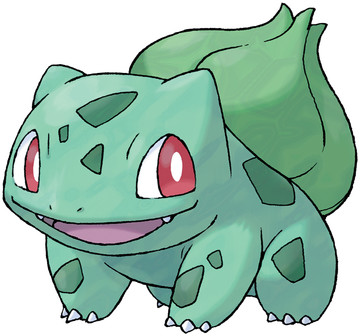

## Version guidée

Les prochaines parties permettront de faire l’exercice ci-dessus
étape par étape,
de manière guidée.

Nous souhaitons tout d’abord obtenir les
informations personnelles de tous
les pokemons sur [pokemondb.net](http://pokemondb.net/pokedex/national).

Les informations que nous aimerions obtenir au final pour les pokemons sont celles contenues dans 4 tableaux :

-   Pokédex data
-   Training
-   Breeding
-   Base stats

Nous proposons ensuite de récupérer et afficher les images.

### Etape 1: constituer un DataFrame de caractéristiques

<div class="alert alert-success" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #3fb618;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Exercice 2b : Les pokémons (version guidée)</h3>

Pour récupérer les informations, le code devra être divisé en plusieurs étapes :

1.  Trouvez la page principale du site et la transformer en un objet intelligible pour votre code.
    Les fonctions suivantes vous seront utiles :

-   `urllib.request.Request`
-   `urllib.request.urlopen`
-   `bs4.BeautifulSoup`

1.  Créez une fonction qui permet de récupérer la page d’un pokémon à partir de son nom.

2.  A partir de la page de `bulbasaur`, obtenez les 4 tableaux qui nous intéressent :

-   on va chercher l’élément suivant : `('table', { 'class' : "vitals-table"})`
-   puis stocker ses éléments dans un dictionnaire

1.  Récupérez par ailleurs la liste de noms des pokémons qui nous permettra de faire une boucle par la suite. Combien trouvez-vous de pokémons ?

2.  Ecrire une fonction qui récupère l’ensemble des informations sur les dix premiers pokémons de la liste et les intègre dans un `DataFrame`

</div>

A l’issue de la question 3,
vous devriez obtenir une liste de caractéristiques proche de celle-ci:

defaultdict(None,
            {'National №': '001',
             'name': 'bulbasaur',
             'Type': ' Grass Poison ',
             'Species': 'Seed Pokémon',
             'Height': '0.7\xa0m (2′04″)',
             'Weight': '6.9\xa0kg (15.2\xa0lbs)',
             'Abilities': '1. OvergrowChlorophyll (hidden ability)',
             'Local №': "001 (Red/Blue/Yellow)226 (Gold/Silver/Crystal)001 (FireRed/LeafGreen)231 (HeartGold/SoulSilver)080 (X/Y — Central Kalos)001 (Let's Go Pikachu/Let's Go Eevee)068 (The Isle of Armor)",
             'EV yield': ' 1 Special Attack ',
             'Catch rate': ' 45 (5.9% with PokéBall, full HP) ',
             'Base Friendship': ' 50 (normal) ',
             'Base Exp.': '64',
             'Growth Rate': 'Medium Slow',
             'Egg Groups': 'Grass, Monster',
             'Gender': '87.5% male, 12.5% female',
             'Egg cycles': '20 (4,884–5,140 steps) ',
             'HP': '45',
             'Attack': '49',
             'Defense': '

La structure est ici en dictionnaire, ce qui est pratique.

Enfin, vous les
informations sur les dix premiers pokémons de la liste intégrées dans un
`DataFrame` prendront l’aspect suivant:

,National №,name,Type,Species,Height,Weight,Abilities,Local №,EV yield,Catch rate,...,Growth Rate,Egg Groups,Gender,Egg cycles,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,001,bulbasaur,Grass Poison,Seed Pokémon,0.7 m (2′04″),6.9 kg (15.2 lbs),1. OvergrowChlorophyll (hidden ability),001 (Red/Blue/Yellow)226 (Gold/Silver/Crystal)...,1 Special Attack,"45 (5.9% with PokéBall, full HP)",...,Medium Slow,"Grass, Monster","87.5% male, 12.5% female","20 (4,884–5,140 steps)",45,49,49,65,65,45
1,002,ivysaur,Grass Poison,Seed Pokémon,1.0 m (3′03″),13.0 kg (28.7 lbs),1. OvergrowChlorophyll (hidden ability),002 (Red/Blue/Yellow)227 (Gold/Silver/Crystal)...,"1 Special Attack, 1 Special Defense","45 (5.9% with PokéBall, full HP)",...,Medium Slow,"Grass, Monster","87.5% male, 12.5% female","20 (4,884–5,140 steps)",60,62,63,80,80,60
2,003,venusaur,Grass Poison,Seed Pokémon,2.0 m (6′07″),100.0 kg (220.5 lbs),1. OvergrowChlorophyll (hidden ability),003 (Red/Blue/Yellow)228 (Gold/Silver/Crystal)...,"2 Special Attack, 1 Special Defense","45 (5.9% with PokéBall, full HP)",...,Medium Slow,"Grass, Monster","87.5% male, 12.5% female","20 (4,884–5,140 steps)",80,82,83,100,100,80
3,004,charmander,Fire,Lizard Pokémon,0.6 m (2′00″),8.5 kg (18.7 lbs),1. BlazeSolar Power (hidden ability),004 (Red/Blue/Yellow)229 (Gold/Silver/Crystal)...,1 Speed,"45 (5.9% with PokéBall, full HP)",...,Medium Slow,"Dragon, Monster","87.5% male, 12.5% female","20 (4,884–5,140 steps)",39,52,43,60,50,65
4,005,charmeleon,Fire,Flame Pokémon,1.1 m (3′07″),19.0 kg (41.9 lbs),1. BlazeSolar Power (hidden ability),005 (Red/Blue/Yellow)230 (Gold/Silver/Crystal)...,"1 Special Attack, 1 Speed","45 (5.9% with PokéBall, full HP)",...,Medium Slow,"Dragon, Monster","87.5% male, 12.5% female","20 (4,884–5,140 steps)",58,64,58,80,65,80


### Etape 2: récupérer et afficher des photos de Pokemon

Nous aimerions que vous récupériez également les images des 5 premiers pokémons
et que vous les enregistriez dans un dossier.

<div class="alert alert-success" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #3fb618;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Exercice 2b : Les pokémons (version guidée)</h3>

-   Les URL des images des pokemon prennent la forme *“https://img.pokemondb.net/artwork/{pokemon}.jpg”*.
    Utiliser les modules `requests` et `shutil` pour télécharger
    et enregistrer en local les images.
-   Importer ces images stockées au format JPEG dans `Python` grâce à la fonction `imread` du package `skimage.io`

</div>

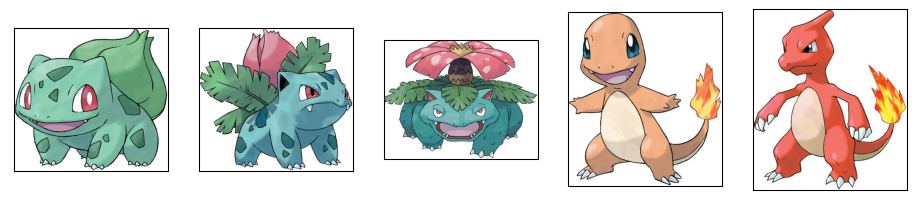

# `Selenium` : mimer le comportement d’un utilisateur internet

Jusqu’à présent,
nous avons raisonné comme si nous connaissions toujours l’url qui nous intéresse.
De plus, les pages que nous visitons sont **“statiques”**,
elles ne dépendent pas d’une action ou d’une recherche de l’internaute.

Nous allons voir à présent comment nous en sortir pour remplir
des champs sur un site *web* et récupérer ce qui nous intéresse.
La réaction d’un site *web* à l’action d’un utilisateur passe régulièrement par
l’usage de `JavaScript` dans le monde du développement *web*.
Le *package* [Selenium](https://pypi.python.org/pypi/selenium) permet
de reproduire, depuis un code automatisé, le comportement
manuel d’un utilisateur. Il permet ainsi
d’obtenir des informations du site qui ne sont pas dans le
code `HTML` mais qui apparaissent uniquement à la suite de
l’exécution de script `JavaScript` en arrière plan.

`Selenium` se comporte comme un utilisateur *lambda* sur internet :
il clique sur des liens, il remplit des formulaires, etc.

## Premier exemple en scrapant un moteur de recherche

Dans cet exemple, nous allons essayer d’aller sur le
site de [Bing Actualités](https://www.bing.com/news)
et entrer dans la barre de recherche un sujet donné.
Pour tester, nous allons faire une recherche avec le mot-clé **“Trump”**.

L’installation de `Selenium` nécessite d’avoir `Chromium` qui est un
navigateur Google Chrome minimaliste.
La version de [chromedriver](https://sites.google.com/a/chromium.org/chromedriver/)
doit être `>= 2.36` et dépend de la version de `Chrome` que vous avez sur votre environnement
de travail. Pour installer cette version minimaliste de `Chrome` sur un environnement
`Linux`, vous pouvez
vous référer à l’encadré dédié

<div class="alert alert-info" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #007bff80;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> `Installation de Selenium`</h3>

D’abord, il convient d’installer les dépendances.
Sur `Colab`, vous pouvez utiliser les commandes suivantes:

``` python
!sudo apt-get update
!sudo apt install -y unzip xvfb libxi6 libgconf-2-4 -y
!sudo apt install chromium-chromedriver -y
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
```

Si vous êtes sur le `SSP-Cloud`, vous pouvez
exécuter les commandes suivantes:

``` python
!wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb -O /tmp/chrome.deb
!sudo apt-get update
!sudo -E apt-get install -y /tmp/chrome.deb
!pip install chromedriver-autoinstaller selenium

import chromedriver_autoinstaller
chromedriver_autoinstaller.install()
```

Vous pouvez ensuite installer `Selenium`. Par
exemple, depuis une
cellule de `Notebook`:

``` python
!pip install selenium
```

</div>

Après avoir installé `Chromium`,
il est nécessaire d’indiquer à `Python` où
le trouver. Si vous êtes sur `Linux` et que vous
avez suivi les consignes précédentes, vous
pouvez faire:

In [44]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
import selenium
path_to_web_driver = "chromedriver"

En premier lieu, il convient d’initialiser le comportement
de `Selenium` en répliquant les paramètres
du navigateur. Pour cela, on va d’abord initialiser
notre navigateur avec quelques options:

In [45]:
import time

from selenium import webdriver
from selenium.webdriver.common.keys import Keys

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
#chrome_options.add_argument('--verbose') 

Puis on lance le navigateur:

In [47]:
browser = webdriver.Chrome(executable_path=path_to_web_driver,
                           options=chrome_options)

On va sur le site de `Bing Actualités`, et on lui indique le mot clé que nous souhaitons chercher.
En l’occurrence, on s’intéresse aux actualités de Donald Trump.
Après avoir inspecté la page depuis les outils de développement du navigateur,
on voit que la barre de recherche est un élement du code appelé `q` (comme *query*).
On va ainsi demander à `selenium` de chercher cet élément:

In [48]:
browser.get('https://www.bing.com/news')

search = browser.find_element("name", "q")
print(search)
print([search.text, search.tag_name, search.id])

# on envoie à cet endroit le mot qu'on aurait tapé dans la barre de recherche
search.send_keys("Trump")

search_button = browser.find_element("xpath", "//input[@id='sb_form_go']") 
search_button.click()

<selenium.webdriver.remote.webelement.WebElement (session="9facc0563c9eba0d33eafc59e82105c5", element="0f40dd10-ff5d-496c-a0d1-406af9885e0e")>
['', 'input', '0f40dd10-ff5d-496c-a0d1-406af9885e0e']

`selenium` permet de capturer l’image qu’on verrait dans le navigateur
avec `get_screenshot_as_png`. Cela peut être utile pour vérifier qu’on
a fait la bonne action:

In [49]:
png = browser.get_screenshot_as_png()

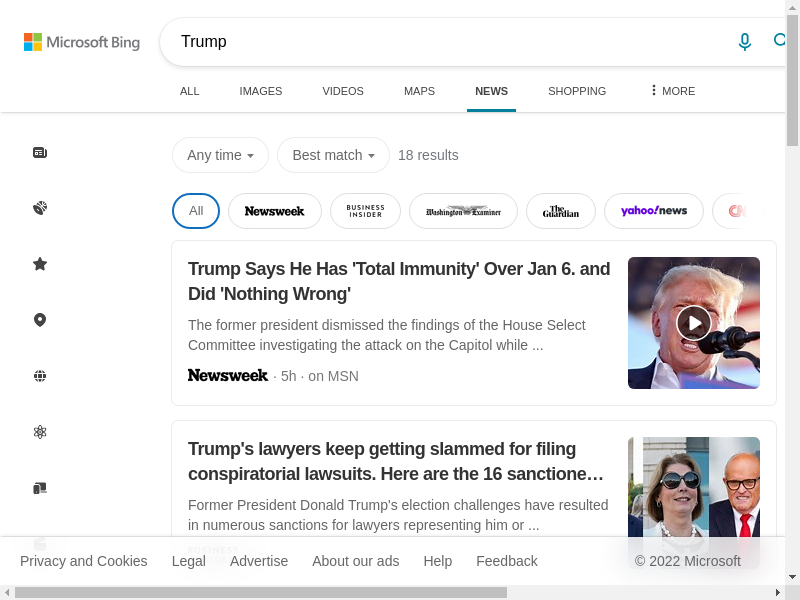

In [50]:
from IPython.display import Image
Image(png, width='500')

Enfin, on peut extraire les résultats. Plusieurs
méthodes sont disponibles. La méthode la plus
pratique, lorsqu’elle est disponible,
est d’utiliser le `XPath` qui est un chemin
non ambigu pour accéder à un élement. En effet,
plusieurs éléments peuvent partager la même classe ou
le même attribut ce qui peut faire qu’une recherche
de ce type peut renvoyer plusieurs échos.
Pour déterminer le `XPath` d’un objet, les outils
de développeurs de votre site *web* sont pratiques.
Par exemple, sous `Firefox`, une fois que vous
avez trouvé un élément dans l’inspecteur, vous
pouvez faire `click droit > Copier > XPath`.

In [51]:
from selenium.common.exceptions import StaleElementReferenceException
links = browser.find_elements("xpath", "//div/a[@class='title'][@href]")

results = []
for link in links:
    try:
        url = link.get_attribute('href')
    except StaleElementReferenceException as e:
        print("Issue with '{0}' and '{1}'".format(url, link))
        print("It might be due to slow javascript which produces the HTML page.")
    results.append(url)

Enfin, pour mettre fin à notre session, on demande
à `Python` de quitter le navigateur

In [52]:
browser.quit()

On a obtenu les résultats suivants:

In [53]:
print(results)

['https://www.msn.com/en-us/news/politics/trump-says-he-has-total-immunity-over-jan-6-and-did-nothing-wrong/ar-AA15HGly', 'https://www.businessinsider.com/trump-lawyers-sanctioned-by-courts-election-lawsuits-2022-12', 'https://www.msn.com/en-us/news/politics/a-lone-trump-appointed-judge-in-texas-should-not-have-the-ability-to-block-student-loan-forgiveness-for-millions-of-americans-says-a-democratic-lawmaker-introducing-a-bill-to-stop-it-from-happening-again/ar-AA15I4Sj', 'https://www.msn.com/en-us/news/politics/trump-said-he-told-ivanka-and-jared-kushner-not-to-join-his-2024-campaign-because-people-are-too-mean-and-nasty/ar-AA15HzG4', 'https://www.msn.com/en-us/news/politics/house-to-release-trumps-redacted-tax-returns-on-tuesday-report/ar-AA15I3Of', 'https://www.theguardian.com/us-news/2022/dec/26/trump-presidential-campaign-republican-rivals-announcement', 'https://news.yahoo.com/alex-jones-did-nothing-wrong-151307003.html', 'https://www.theguardian.com/us-news/2022/dec/27/trump-oli

Les autres méthodes utiles de `Selenium`:

`find_element(****).click()` \| Une fois qu’on a trouvé un élément réactif, notamment un bouton, on peut cliquer dessus pour activer une nouvelle page \|  
`find_element(****).send_keys("toto")` \| Une fois qu’on a trouvé un élément, notamment un champ où s’authentifier, on peut envoyer une valeur, ici *“toto”*.

## Utiliser selenium pour jouer à 2048

Dans cet exemple, on utilise le module pour que `Python`
appuie lui même sur les touches du clavier afin de jouer à 2048.

Note : ce bout de code ne donne pas une solution à 2048,
il permet juste de voir ce qu’on peut faire avec `Selenium`

In [54]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

# on ouvre la page internet du jeu 2048

browser = webdriver.Chrome(executable_path=path_to_web_driver,
                           options=chrome_options)
browser.get('https://play2048.co//')

# Ce qu'on va faire : une boucle qui répète inlassablement la même chose : haut / droite / bas / gauche

# on commence par cliquer sur la page pour que les touches sachent 
browser.find_element("class name", 'grid-container').click()
grid = browser.find_element("tag name", 'body')

# pour savoir quels coups faire à quel moment, on crée un dictionnaire
direction = {0: Keys.UP, 1: Keys.RIGHT, 2: Keys.DOWN, 3: Keys.LEFT}
count = 0

while True:
    try: # on vérifie que le bouton "Try again" n'est pas là - sinon ça veut dire que le jeu est fini
        retryButton = browser.find_element("link text",'Try again')
        scoreElem = browser.find_element("class name", 'score-container')
        break
    except:
        #Do nothing.  Game is not over yet
        pass
    # on continue le jeu - on appuie sur la touche suivante pour le coup d'après
    count += 1
    grid.send_keys(direction[count % 4]) 
    time.sleep(0.1)

print('Score final : {} en {} coups'.format(scoreElem.text, count))    
browser.quit()

# Exercices supplémentaires

## Récupérer les noms et âges des ministres français

Pour cet exercice, on propose de scraper la liste des ministres français depuis le [site du gouvernement](https://www.gouvernement.fr/composition-du-gouvernement). L’objectif sera, *in fine* de faire un graphique qui représente la distribution de leurs âges.
La solution pour cet exercice a été proposée
par [Tien-Thinh](https://github.com/tttienthinh)
et [Antoine Palazzolo](https://github.com/antoine-palazz).

Pour être en mesure de faire cet exercice, il est
recommandé d’installer le package `dateparser`

In [55]:
!pip install dateparser
#depuis un notebook. En ligne de commande, retirer le !

Pour cet exercice, nous proposons d’utiliser les *packages*
suivants:

In [56]:
import time
from tqdm import tqdm
import urllib
import re, datetime
from dateutil.parser import parse as parse_dt
import dateparser

import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import bs4

Nous proposons également d’utiliser la fonction suivante
pour calculer l’âge à partir de la date de naissance.

In [57]:
def from_birth_to_age(birth):
    today = datetime.date.today()
    return today.year - birth.year - ((today.month, today.day) < (birth.month, birth.day))

<div class="alert alert-success" role="alert" style="color: rgba(0,0,0,.8); background-color: white; margin-top: 1em; margin-bottom: 1em; margin:1.5625emauto; padding:0 .6rem .8rem!important;overflow:hidden; page-break-inside:avoid; border-radius:.25rem; box-shadow:0 .2rem .5rem rgba(0,0,0,.05),0 0 .05rem rgba(0,0,0,.1); transition:color .25s,background-color .25s,border-color .25s ; border-right: 1px solid #dee2e6 ; border-top: 1px solid #dee2e6 ; border-bottom: 1px solid #dee2e6 ; border-left:.2rem solid #3fb618;">
<h3 class="alert-heading"><i class="fa fa-pencil"></i> Exercice : Les ministres français </h3>

1.  Créer des variables globales `url_gouvernement` et `url_gouvernement` qui représenteront,
    respectivement, la racine de l’URL du site web et le chemin au sein de celui-ci ;
2.  Utiliser `bs4` pour récupérer la composition du gouvernement, qui est contenue dans un `<div>`
    ayant une classe *ad hoc*. Nommer cet objet `compo`
3.  Utiliser `find_all` pour récupérer la liste des ministres dans `compo`. Nommer
    cet objet `ministres`
4.  Inspecter la structure des champs au sein de `ministres`. Répérer les id `biography`. Comme
    la structure est générique, on va écrire une fonction `from_bio_to_age` sur laquelle on va itérer
    pour chaque élément de la liste `ministres`. Cette fonction effectuera les opérations suivantes:
    -   Remplacer les champs de dates de naissance non numériques (par exemple *“1er”*), en valeur numérique (par exemple 1).
    -   Utiliser la regex `[0-3]?\d \S* \d{4}` avec le *package* `re` pour extraire les dates
        de naissance. Nommer l’objet `str_date`.
    -   Appliquer `dateparser.parse` pour convertir sous forme de date
    -   Appliquer `from_birth_to_age` pour transformer cette date de naissance en âge
5.  Pour chaque élément de la liste `ministres`, faire une boucle (en introduisant un
    `time.sleep(0.25)` entre chaque itération pour ne pas surcharger le site):
    -   Récupérer les noms et prénoms, fonctions pour chaque ministre
    -   Récupérer l’URL de la photo
    -   Créer un URL pour chaque ministre afin d’appliquer la fonction
        `from_bio_to_age`
6.  Utiliser `matplotlib` ou `seaborn` pour faire un histogramme d’âge

</div>

A l’issue de la question 4, on devrait
retrouver les informations suivantes:

In [61]:
print(f"Nous retrouvons ainsi {len(ministres)} ministres.")

Nous retrouvons ainsi 44 ministres.

In [62]:
def from_bio_to_age(url):
    html = urllib.request.urlopen(url).read()
    page = bs4.BeautifulSoup(html)
    s = page.find("div", {"id":"biography"}).text.replace("1er", "1") # un peu ad hoc
    expression = re.compile("[0-3]?\d \S* \d{4}") # renvoie parfois des dates autres que dates de naissance
    str_date = expression.findall(s)[0]
    date_de_naissance = dateparser.parse(str_date).date()
    return from_birth_to_age(date_de_naissance)

*In fine*, on obtient une liste dont le premier élément
prend la forme suivante:

In [64]:
liste[0]

{'Nom complet': 'Élisabeth Borne',
 'Fonction': 'Première ministre',
 'Photo': 'https://www.gouvernement.fr/sites/default/files/styles/composition_large/public/pm_elisabeth_borne_portrait_matignon_.jpg?itok=lT5QYQhk',
 'href': 'https://www.gouvernement.fr/ministre/elisabeth-borne',
 'Age': 61}

Finalement, le `DataFrame` pourra être
structuré sous la forme suivante. On va éliminer
les âges égaux à 0 sont qui sont des erreurs
de scraping:
lorsque la date de naissance complète n’est pas disponible
sur la biographie d’un ministre.

In [65]:
df = pd.DataFrame(liste)
df = df.loc[df['Age'] != 0]
df.head(3)

,Nom complet,Fonction,Photo,href,Age
0,Élisabeth Borne,Première ministre,https://www.gouvernement.fr/sites/default/file...,https://www.gouvernement.fr/ministre/elisabeth...,61
1,Olivier Véran,Ministre délégué auprès de la Première ministr...,https://www.gouvernement.fr/sites/default/file...,https://www.gouvernement.fr/ministre/olivier-v...,42
2,Franck Riester,Ministre délégué auprès de la Première ministr...,https://www.gouvernement.fr/sites/default/file...,https://www.gouvernement.fr/ministre/franck-ri...,48


Finalement, l’histogramme aura l’aspect suivant:

(array([0., 1., 5., 6., 6., 4., 2., 6., 3., 4., 2., 1., 0.]),
 array([25., 29., 33., 37., 41., 45., 49., 53., 57., 61., 65., 69., 73.,
        77.]),
 <BarContainer object of 13 artists>)

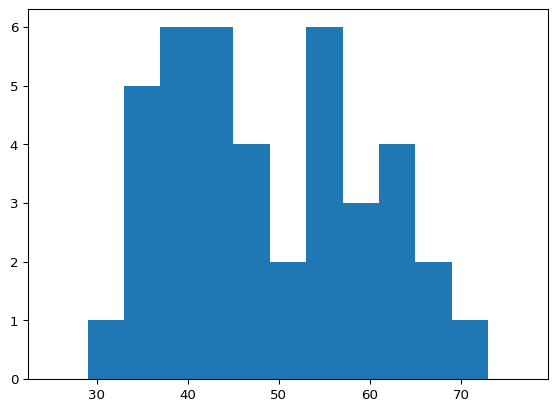

In [66]:
plt.hist(df.Age, bins=np.arange(25, 80, 4))